#### Import Pandas library & reading wikipedia HTML

##   1. Description of the Problem and Discussion of the Background (Introduction Section)
### Prospect of opening a Gym in toronto, canda
#### Toronto, the capital of the province of Ontario, is the most populous Canadian city. As per 2016 census, 15-50 years aged population constitues of approximately 49% of total population of toronto.while #### using general assumtion that this age group's consider going to gym relatively more it is one of best place to start a gym in toronto. 
#### In this project  we analyze each neighborhood in toronto to identify the profitable area and  we will go through the process to make a decision where to open a gym.

 ## 2. Data acquisition and cleaning
 


   ### 2.1 Data sources
   #### 2.1.1) https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M - this  wiki page contains information about the neighborhoods present in Toronto. This page has the postal code, borough & the name of all the neighborhoods present in Toronto.
   #### 2.1.2) “https://cocl.us/Geospatial_data” csv file to get all the geographical coordinates of the neighborhoods.
   #### 2.1.3 ) Location  (latitude and longitude) and other information about various venues in Toronto  (https://developer.foursquare.com/docs), Following information collected from this API ,-  Name, category, Latitude, Longitude
   


#### 2.2 Data Cleaning
##### a) Scraping Toronto Neighborhoods Table from Wikipedia
Scraped the following Wikipedia page, “List of Postal code of Canada: M” in order to obtain the data about the Toronto & the Neighborhoods in it.
 Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
 Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. 
 These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
 If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.     wikipedia - package is used to scrape the data from wiki.


In [113]:
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

In [114]:
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


#### Create a seperate data frame with out not assigned in Borough column

In [115]:
df_1 = df [df ['Borough'] != 'Not assigned' ].reset_index(drop = True)

In [116]:
df_1.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#### Assigning neighbourhood name as borough where non assigned in neighbourhood

In [117]:
#count =0
for index in range(len(df_1)):
     if (df_1.iloc[index]['Neighbourhood'])  == 'Not assigned' :
        df_1.iloc[index]['Neighbourhood'] = df_1.iloc[index]['Borough']
        

In [118]:
df_1.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [119]:
df_1.shape

(103, 3)

#### b) Adding geographical coordinates to the neighborhoods

Next important step is adding the geographical coordinates to these neighborhoods. To do so I'm extracting the data present in the Geospatial Data csv file and I'm combining it with the existing neighborhood dataframe by merging them both based on the postal code.
### using the CSV file to get geo spatial data


In [120]:
df_CSV = pd.read_csv('http://cocl.us/Geospatial_data')
df_CSV.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### merging two databases based on postal code

In [121]:
df_1 = pd.merge(df_1, df_CSV, on='Postal Code')

In [122]:
df_1.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Explore the neighbourhoods in Toronto

In [123]:
Toronto_data = df_1 #[df_1 ['Borough'].str.contains('Toronto')].reset_index(drop = True)
Toronto_data.head(10)
#Toronto_data.shape


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [124]:
Toronto_data.groupby('Borough').count()

,Postal Code,Neighbourhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Scarborough,17,17,17,17
West Toronto,6,6,6,6


In [182]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

### Toronto coordinates

In [126]:
from geopy.geocoders import Nominatim
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="TORO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [183]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
map_toronto

In [184]:
# add markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [129]:
CLIENT_ID = 'E14NL5FLFQJA3GHF5UF3WXYT4QM1QLFEFBI24ROKDTB1CGZD' # your Foursquare ID
CLIENT_SECRET = '5HFK2FL3IB2HHB31EQVWSIQBEQYUHVFIEYAM42DZGCHK5UUV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E14NL5FLFQJA3GHF5UF3WXYT4QM1QLFEFBI24ROKDTB1CGZD
CLIENT_SECRET:5HFK2FL3IB2HHB31EQVWSIQBEQYUHVFIEYAM42DZGCHK5UUV


In [130]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=E14NL5FLFQJA3GHF5UF3WXYT4QM1QLFEFBI24ROKDTB1CGZD&client_secret=5HFK2FL3IB2HHB31EQVWSIQBEQYUHVFIEYAM42DZGCHK5UUV&v=20180605&ll=43.6534817,-79.3839347&radius=1000&limit=100'

In [131]:
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
results =requests.get(url).json()
print (results)

{'meta': {'code': 200, 'requestId': '5f2812be72cee757fc5e6df1'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Bay Street Corridor', 'headerFullLocation': 'Bay Street Corridor, Toronto', 'headerLocationGranularity': 'neighborhood', 'totalResults': 239, 'suggestedBounds': {'ne': {'lat': 43.66248170900001, 'lng': -79.37151886118865}, 'sw': {'lat': 43.64448169099999, 'lng': -79.39635053881135}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '5227bb01498e17bf485e6202', 'name': 'Downtown Toronto', 'location': {'lat': 43.65323167517444, 'lng': -79.38529600606677, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65323167517444, 'lng': -79.38529600606677}], 'distance': 113, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': '

### function to get category

In [132]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [133]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,Indigo,Bookstore,43.653515,-79.380696
4,Poke Guys,Poke Place,43.654895,-79.385052


In [134]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Explore Neighbourhoods in Toronto

In [135]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [136]:
Toronto_venues = getNearbyVenues(names=Toronto_data['Neighbourhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [137]:
print(Toronto_venues.shape)
Toronto_venues.head(10)

(2146, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
5,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
6,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
7,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
8,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
9,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery


### Number of venues in each categeory

In [138]:
Toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16


### UNIQUE VENUES IN TORONOTO

In [139]:
print('There are {} unique venues in toronto'.format (len(Toronto_venues['Venue Category'].unique())))

There are 264 unique venues in toronto


### Analyze Each Neighbourhood

In [140]:
# one hot encoding
Torento_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Torento_onehot['Neighbourhood'] = Toronto_venues['Neighbourhood'] 
#Torento_onehot['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [Torento_onehot.columns[-1]] + list(Torento_onehot.columns[:-1])
Torento_onehot = Torento_onehot[fixed_columns]

Torento_onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
Torento_onehot.shape

(2146, 265)

In [142]:
Torento_grouped = Torento_onehot.groupby('Neighbourhood').mean().reset_index()
Torento_grouped.head(5)

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
Torento_grouped.shape

(96, 265)

In [144]:
print(Toronto_venues['Venue Category'].value_counts())

Coffee Shop                      193
Café                              99
Restaurant                        68
Pizza Place                       52
Park                              52
Japanese Restaurant               42
Sandwich Place                    42
Hotel                             42
Italian Restaurant                42
Bakery                            40
Clothing Store                    37
Gym                               35
Bar                               33
Grocery Store                     28
American Restaurant               27
Sushi Restaurant                  26
Bank                              25
Pub                               24
Fast Food Restaurant              24
Breakfast Spot                    24
Seafood Restaurant                23
Thai Restaurant                   21
Pharmacy                          20
Ice Cream Shop                    20
Diner                             19
Beer Bar                          18
Vegetarian / Vegan Restaurant     17
G

### 3. Exploratory Data Analysis

#### 3.1 Relationship between neighborhood and Gym
#### First we will extract the Neighborhood and Gym column from the above toronto dataframe for further analysis:

In [145]:
Toronto_part = Torento_grouped[['Neighbourhood', 'Gym']]
Toronto_part

,Neighbourhood,Gym
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.166667
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000
5,Berczy Park,0.017241
6,"Birch Cliff, Cliffside West",0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.045455
8,"Business reply mail Processing Centre, South C...",0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000


In [146]:
Toronto_merged = pd.merge(Toronto_data, Toronto_part, on='Neighbourhood')
Toronto_merged

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Gym
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.000000
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.000000
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.000000
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.031250
5,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.000000
6,M3B,North York,Don Mills,43.745906,-79.352188,0.120000
7,M3C,North York,Don Mills,43.725900,-79.340923,0.120000
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0.000000
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.010000


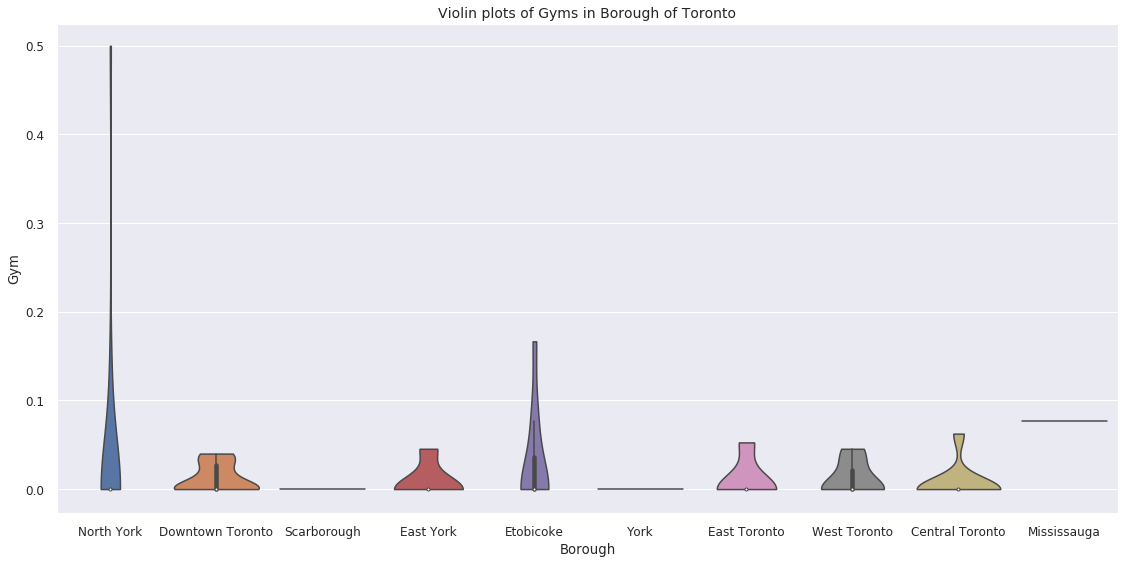

In [147]:
# use categorical plot to identify most boroughs with densly populated with gyms

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Gym", x="Borough", data=Toronto_merged, cut=0);

plt.title('Violin plots of Gyms in Borough of Toronto', fontsize=14)
plt.show()

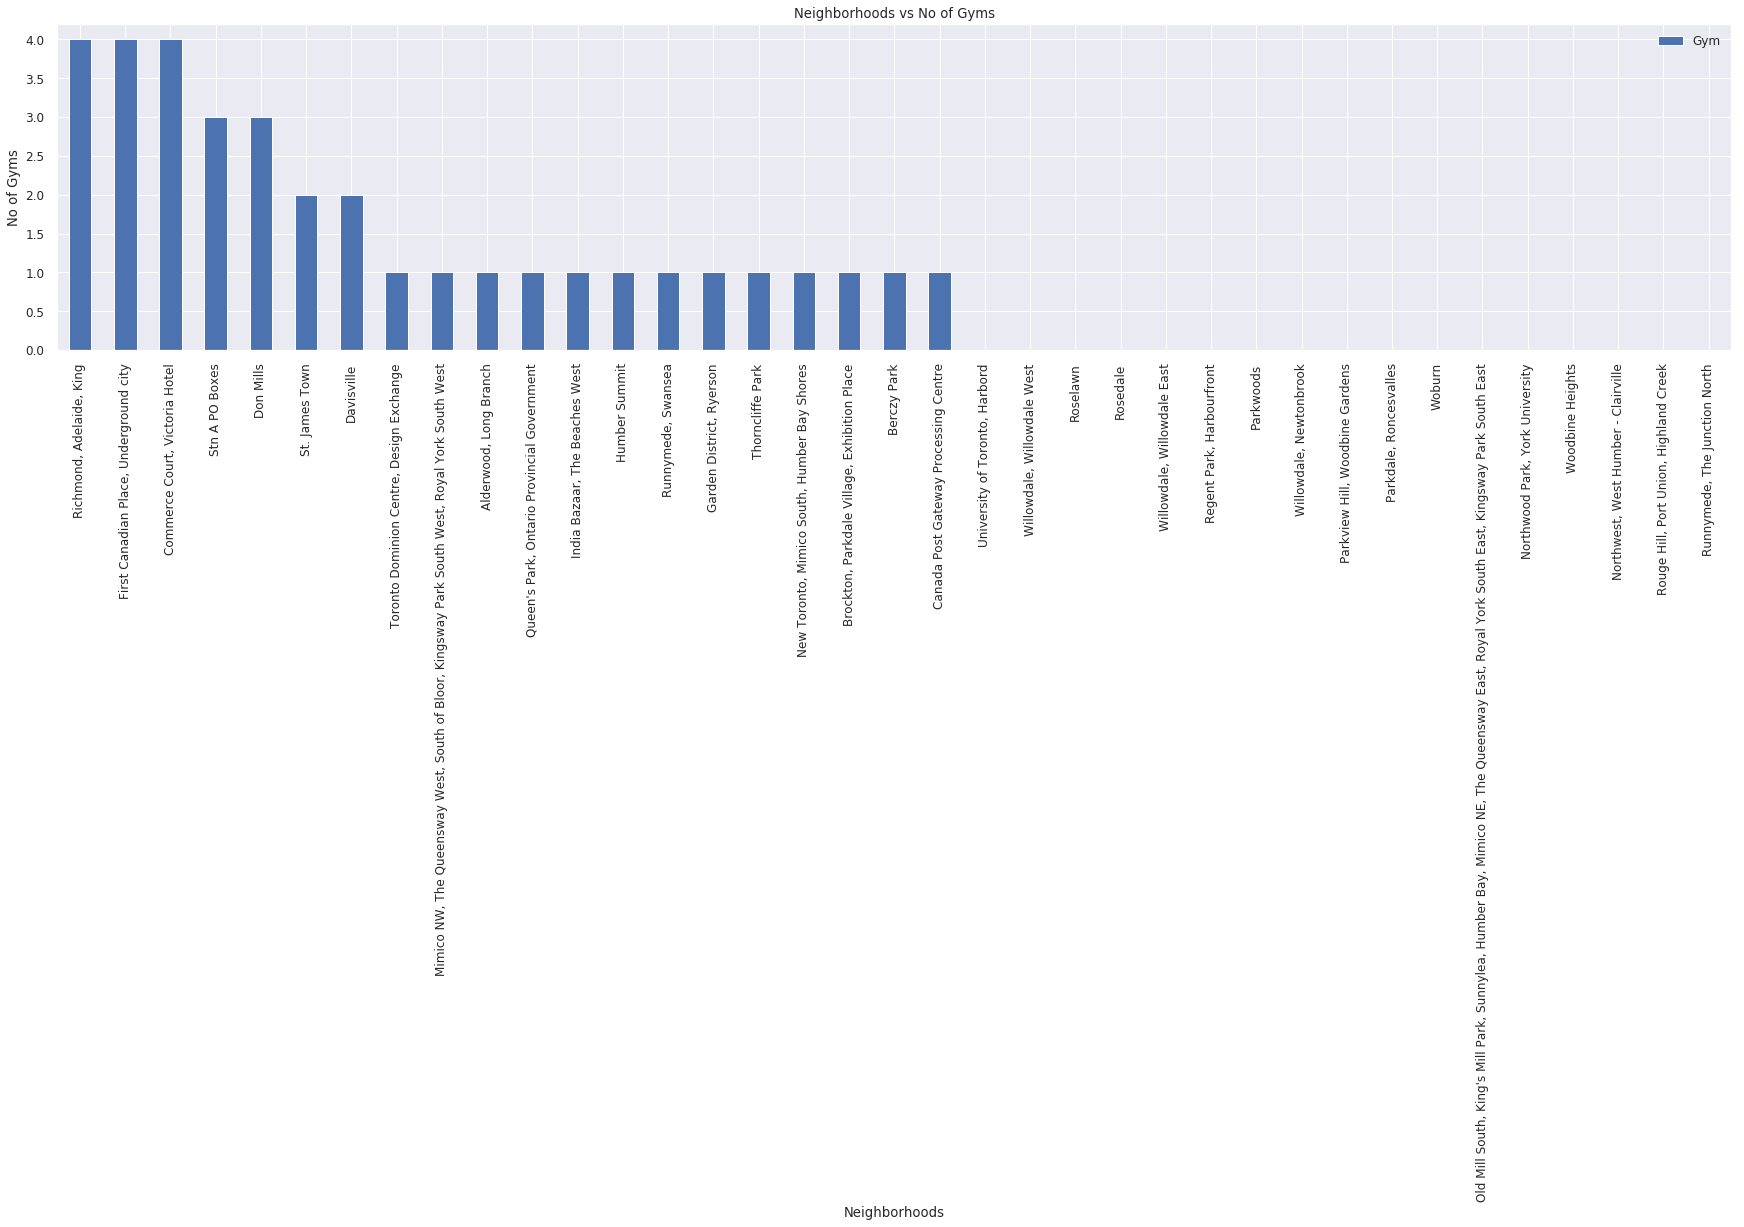

In [148]:
graph = pd.DataFrame(Torento_onehot.groupby('Neighbourhood')['Gym'].sum())
graph = graph.sort_values(by ='Gym', ascending=False)
graph.iloc[:37].plot(kind='bar', figsize=(30,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Gyms")
plt.title("Neighborhoods vs No of Gyms")
plt.show()

In [149]:
#TORONTO & EAST YORK population distribution
TEY_population_df  = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto')[12]
TEY_population_df  

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
TEY_population_df_1  =   TEY_population_df[['Riding','Population']]
TEY_population_df_1

,Riding,Population
0,Spadina-Fort York,114315
1,Beaches-East York,108435
2,Davenport,107395
3,Parkdale-High Park,106445
4,Toronto-Danforth,105395
5,Toronto-St. Paul's,104940
6,University-Rosedale,100520
7,Toronto Centre,99590


In [151]:
NY_population_df  = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto')[13]
NY_population_df_1 = NY_population_df[['Riding','Population']]
NY_population_df_1

,Riding,Population
0,Willowdale,117405
1,Eglinton-Lawrence,112925
2,Don Valley North,109060
3,Humber River-Black Creek,107725
4,York Centre,103760
5,Don Valley West,101790
6,Don Valley East,93170


In [152]:
#SCARBOROUGH population distribution 
SC_population_df  = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto')[14]
SC_population_df_1 = SC_population_df[['Riding','Population']]
SC_population_df_1

,Riding,Population
0,Scarborough Centre,110450
1,Scarborough Southwest,108295
2,Scarborough-Agincourt,104225
3,Scarborough-Rouge Park,101445
4,Scarborough-Guildwood,101115
5,Scarborough North,97610


In [153]:
#ETOBICOKE & YORK population distribution 
ETY_population_df  = pd.read_html('https://en.m.wikipedia.org/wiki/Demographics_of_Toronto')[15]
ETY_population_df_1 = ETY_population_df[['Riding','Population']]
ETY_population_df_1

,Riding,Population
0,Etobicoke-Lakeshore,127520
1,Etobicoke North,116960
2,Etobicoke Centre,116055
3,York South-Weston,115130


In [154]:
#Merge all the population table 
ET = ETY_population_df_1.append(TEY_population_df_1,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = NY_population_df_1.append(SC_population_df_1,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_df = SN.append(ET,sort=True).reset_index()
pop_df.drop('index',axis=1,inplace=True)
pop_df_1 = pop_df[['Riding', 'Population']]
pop_df_1

,Riding,Population
0,Willowdale,117405
1,Eglinton-Lawrence,112925
2,Don Valley North,109060
3,Humber River-Black Creek,107725
4,York Centre,103760
5,Don Valley West,101790
6,Don Valley East,93170
7,Scarborough Centre,110450
8,Scarborough Southwest,108295
9,Scarborough-Agincourt,104225


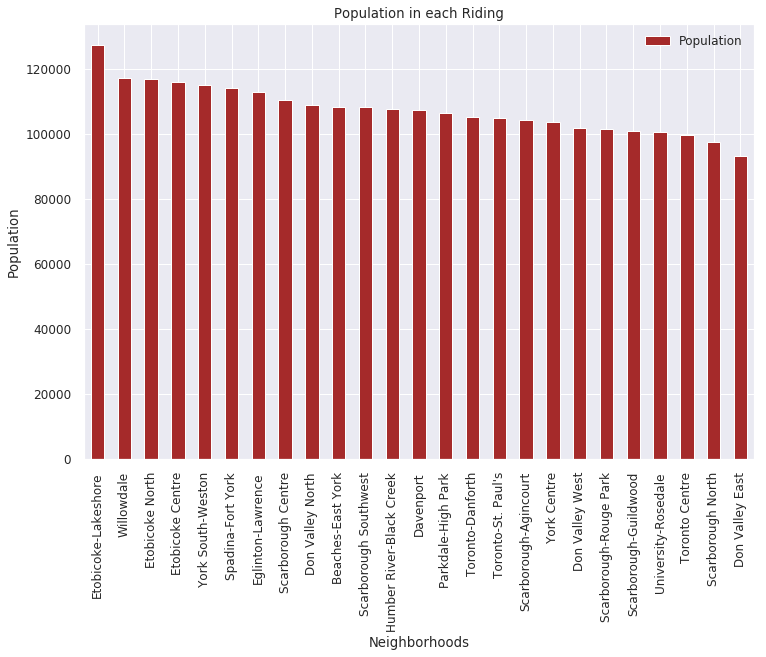

In [155]:
bar_graph = pop_df_1.sort_values(by='Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Population',figsize=(12,8), color='brown')
plt.title("Population in each Riding")
plt.xlabel("Ridings")
plt.ylabel("Population")
plt.show()

#### 3.4 Relationship between population and Gyms 

#### First get the list of neighbourhoods present in the riding using the wikipedia geography section for each riding. Altering the riding names to match the wikipedia page so we can retrieve the neighborhoods present in those ridings

#### First get the list of neighborhoods present in the riding using the wikipedia geography section for each riding. Altering the riding names to match the wikipedia page so we can retrieve the neighborhoods present in those ridings

In [156]:
#Altering the list to match the wikipedia page so we can retrieve the neighborhoods present in those Ridings
riding_list = pop_df_1['Riding'].to_list()
riding_list[riding_list.index('Scarborough Centre')] = 'Scarborough Centre (electoral district)'
riding_list[riding_list.index('Scarborough North')] = 'Scarborough North (electoral district)'
riding_list[riding_list.index('Willowdale')] = 'Willowdale, Toronto'
riding_list[riding_list.index('Etobicoke Centre')] = 'Etobicoke Centre (electoral district)'
riding_list[riding_list.index('Davenport')] = 'Davenport, Toronto'
riding_list

['Willowdale, Toronto',
 'Eglinton-Lawrence',
 'Don Valley North',
 'Humber River-Black Creek',
 'York Centre',
 'Don Valley West',
 'Don Valley East',
 'Scarborough Centre (electoral district)',
 'Scarborough Southwest',
 'Scarborough-Agincourt',
 'Scarborough-Rouge Park',
 'Scarborough-Guildwood',
 'Scarborough North (electoral district)',
 'Etobicoke-Lakeshore',
 'Etobicoke North',
 'Etobicoke Centre (electoral district)',
 'York South-Weston',
 'Spadina-Fort York',
 'Beaches-East York',
 'Davenport, Toronto',
 'Parkdale-High Park',
 'Toronto-Danforth',
 "Toronto-St. Paul's",
 'University-Rosedale',
 'Toronto Centre']

In [53]:

#Scraping wiki page to get the neighborhoods of ech Ridings

#!conda install -c conda-forge wikipedia --yes 
import wikipedia



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m       conda-forge
    wikipedia:       1.4.0-py_2        conda-forge

The following packages will be UPDATED:

   

In [157]:
import pandas as pd
Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    if section!= None:
        start = section.find('neighbourhoods of') + 17
        stop = section.index('.',start)
        Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighbourhoods':section[start:stop]},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighbourhoods']]
Riding_neighborhood_df

,Riding,Neighbourhoods
0,Don Valley North,"Henry Farm, Bayview Village, Bayview Woods-St..."
1,Humber River-Black Creek,"Humber Summit, Humbermede, Humberlea, York Un..."
2,York Centre,"Westminster–Branson, Bathurst Manor, Wilson H..."
3,Don Valley West,"York Mills, Silver Hills, the western half of..."
4,Don Valley East,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
5,Scarborough Centre (electoral district),Scarborough City Centre (west of McCowan Road...
6,Scarborough Southwest,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
7,Scarborough-Agincourt,"Steeles, L'Amoreaux, Tam O'Shanter-Sullivan, ..."
8,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."
9,Scarborough-Guildwood,"Guildwood, West Hill (west of Morningside Ave..."


In [158]:
Neigh_pop = pd.merge(pop_df_1, Riding_neighborhood_df, on='Riding')

Neigh_pop.drop(columns=['Riding'],inplace =True)
Neigh_pop

,Population,Neighbourhoods
0,109060,"Henry Farm, Bayview Village, Bayview Woods-St..."
1,107725,"Humber Summit, Humbermede, Humberlea, York Un..."
2,103760,"Westminster–Branson, Bathurst Manor, Wilson H..."
3,101790,"York Mills, Silver Hills, the western half of..."
4,93170,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
5,108295,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
6,104225,"Steeles, L'Amoreaux, Tam O'Shanter-Sullivan, ..."
7,101445,"Morningside Heights, Rouge, Port Union, West ..."
8,101115,"Guildwood, West Hill (west of Morningside Ave..."
9,127520,at part of the City of Toronto described as fo...


In [159]:
Neigh_pop['split_neighborhoods'] = Neigh_pop['Neighbourhoods'].str.split(',') 
Neigh_pop.drop(columns=['Neighbourhoods'],inplace=True,axis=1)
Neigh_pop = Neigh_pop.split_neighborhoods.apply(pd.Series).merge(Neigh_pop, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Population'], value_name = "Neighbourhood").drop("variable", axis = 1).dropna()

Neigh_pop.reset_index()
Neigh_pop

,Population,Neighbourhood
0,109060,Henry Farm
1,107725,Humber Summit
2,103760,Westminster–Branson
3,101790,York Mills
4,93170,Flemingdon Park
5,108295,Birch Cliff
6,104225,Steeles
7,101445,Morningside Heights
8,101115,Guildwood
9,127520,at part of the City of Toronto described as fo...


In [160]:
Toronto_part['split_neighbourhoods'] = Toronto_part['Neighbourhood'].str.split(',') 
Toronto_part.drop(columns=['Neighbourhood'],inplace=True,axis=1)
Toronto_part


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Gym,split_neighbourhoods
0,0.000000,[Agincourt]
1,0.166667,"[Alderwood, Long Branch]"
2,0.000000,"[Bathurst Manor, Wilson Heights, Downsview N..."
3,0.000000,[Bayview Village]
4,0.000000,"[Bedford Park, Lawrence Manor East]"
5,0.017241,[Berczy Park]
6,0.000000,"[Birch Cliff, Cliffside West]"
7,0.045455,"[Brockton, Parkdale Village, Exhibition Place]"
8,0.000000,"[Business reply mail Processing Centre, South..."
9,0.000000,"[CN Tower, King and Spadina, Railway Lands, ..."


In [161]:
Toronto_part = Toronto_part.split_neighbourhoods.apply(pd.Series).merge(Toronto_part, left_index = True, right_index = True).drop(["split_neighbourhoods"], axis = 1)\
                    .melt(id_vars = ['Gym'], value_name = "Neighbourhood").drop("variable", axis = 1).dropna()

Toronto_part.reset_index()
Toronto_part

,Gym,Neighbourhood
0,0.000000,Agincourt
1,0.166667,Alderwood
2,0.000000,Bathurst Manor
3,0.000000,Bayview Village
4,0.000000,Bedford Park
5,0.017241,Berczy Park
6,0.000000,Birch Cliff
7,0.045455,Brockton
8,0.000000,Business reply mail Processing Centre
9,0.000000,CN Tower


In [162]:
pop_merged_Gym_perc = pd.merge(Neigh_pop, Toronto_part, on='Neighbourhood')
pop_merged_Gym_perc.head()

,Population,Neighbourhood,Gym
0,109060,Henry Farm,0.0
1,108295,Oakridge,0.0
2,101445,Rouge,0.0
3,103760,Wilson Heights,0.0
4,101445,Port Union,0.0


After performing the data cleaning & data analysis we can identify that their no big relationship established in terms of the  population & Number of gyms.

Thus this marks end of the data cleaning & analyses step in this project. Next we will look into the predictive modeling. In the predictive modelling we are going to use Clustering techniques since this is analysis of unlabelled data. K-Means clustering is used to perform the analysis of the data at hand.

## 4. Predictive Modeling

### 4.1 Clustering Neighborhoods of Toronto:

### First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so we are going to use the elbow method on the Toronto dataset with no of Gyms percentage (i.e. toronto_merged dataframe).

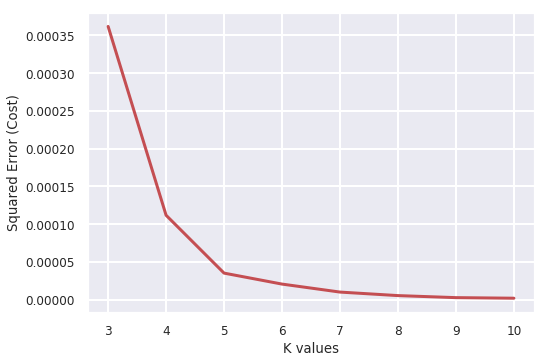

In [163]:
from sklearn.cluster import KMeans

Toronto_part_clustering = Toronto_part.drop('Neighbourhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(Toronto_part_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [90]:
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-runner-5.2          |             py_0          13 KB
    yellowbrick-1.1            |           py36_0         276 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         289 KB

The following NEW packages will be INSTALLED:

    pytest-runner:   5.2-py_0                                 
    yellowbrick:     1.1-py36_0               districtdatalabs

The following packages will be UPDATED:

    ca-certificates: 2020.6.20-hecda079_0     conda-forge      --> 2020.6.24-0     
    certifi:         2020.6.20-py36h9f0ad1d_0 conda-forge      --> 2020.6.20-py36_0


pytest-runner-5.2    | 13 KB     | ##############

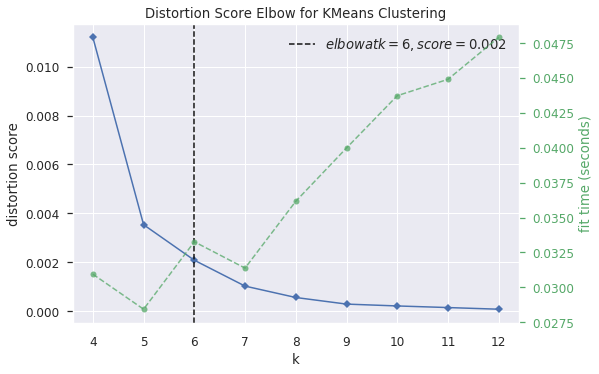

In [164]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(Toronto_part_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [165]:
kclusters = 6

Toronto_part_clustering = Toronto_part.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_part_clustering)

kmeans.labels_

array([0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [166]:
Toronto_part.insert(0, 'Cluster Labels', kmeans.labels_)


In [167]:
Toronto_data['split_neighbourhoods'] = Toronto_data['Neighbourhood'].str.split(',') 
Toronto_data.drop(columns=['Neighbourhood'],inplace=True,axis=1)
Toronto_data

,Postal Code,Borough,Latitude,Longitude,split_neighbourhoods
0,M3A,North York,43.753259,-79.329656,[Parkwoods]
1,M4A,North York,43.725882,-79.315572,[Victoria Village]
2,M5A,Downtown Toronto,43.654260,-79.360636,"[Regent Park, Harbourfront]"
3,M6A,North York,43.718518,-79.464763,"[Lawrence Manor, Lawrence Heights]"
4,M7A,Downtown Toronto,43.662301,-79.389494,"[Queen's Park, Ontario Provincial Government]"
5,M9A,Etobicoke,43.667856,-79.532242,"[Islington Avenue, Humber Valley Village]"
6,M1B,Scarborough,43.806686,-79.194353,"[Malvern, Rouge]"
7,M3B,North York,43.745906,-79.352188,[Don Mills]
8,M4B,East York,43.706397,-79.309937,"[Parkview Hill, Woodbine Gardens]"
9,M5B,Downtown Toronto,43.657162,-79.378937,"[Garden District, Ryerson]"


In [168]:
Toronto_data = Toronto_data.split_neighbourhoods.apply(pd.Series).merge(Toronto_data, left_index = True, right_index = True).drop(["split_neighbourhoods"], axis = 1)\
                    .melt(id_vars = ['Postal Code','Borough','Latitude','Longitude'], value_name = "Neighbourhood").drop("variable", axis = 1).dropna()

Toronto_data.reset_index()
Toronto_data

,Postal Code,Borough,Latitude,Longitude,Neighbourhood
0,M3A,North York,43.753259,-79.329656,Parkwoods
1,M4A,North York,43.725882,-79.315572,Victoria Village
2,M5A,Downtown Toronto,43.654260,-79.360636,Regent Park
3,M6A,North York,43.718518,-79.464763,Lawrence Manor
4,M7A,Downtown Toronto,43.662301,-79.389494,Queen's Park
5,M9A,Etobicoke,43.667856,-79.532242,Islington Avenue
6,M1B,Scarborough,43.806686,-79.194353,Malvern
7,M3B,North York,43.745906,-79.352188,Don Mills
8,M4B,East York,43.706397,-79.309937,Parkview Hill
9,M5B,Downtown Toronto,43.657162,-79.378937,Garden District


In [169]:
Toronto_merged_1 = Toronto_data
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged_1 = Toronto_merged_1.join(Toronto_part.set_index('Neighbourhood'), on='Neighbourhood')
Toronto_merged_1.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
Toronto_merged_1.reset_index(drop=True, inplace=True)
Toronto_merged_1['Cluster Labels'].astype(int)
Toronto_merged_1


,Postal Code,Borough,Latitude,Longitude,Neighbourhood,Cluster Labels,Gym
0,M3A,North York,43.753259,-79.329656,Parkwoods,0.0,0.000000
1,M4A,North York,43.725882,-79.315572,Victoria Village,0.0,0.000000
2,M5A,Downtown Toronto,43.654260,-79.360636,Regent Park,0.0,0.000000
3,M6A,North York,43.718518,-79.464763,Lawrence Manor,0.0,0.000000
4,M7A,Downtown Toronto,43.662301,-79.389494,Queen's Park,3.0,0.031250
5,M1B,Scarborough,43.806686,-79.194353,Malvern,0.0,0.000000
6,M3B,North York,43.745906,-79.352188,Don Mills,5.0,0.120000
7,M4B,East York,43.706397,-79.309937,Parkview Hill,0.0,0.000000
8,M5B,Downtown Toronto,43.657162,-79.378937,Garden District,0.0,0.010000
9,M6B,North York,43.709577,-79.445073,Glencairn,0.0,0.000000


In [171]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:          4.1.0-py_1       conda-forge
    branca:          0.4.1-py_0       conda-forge
    folium:          0.5.0-py_0       conda-forge
    vincent:         0.4.4-py_1       conda-forge

The following package

NameError: name 'folium' is not defined

In [175]:
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged_1['Latitude'], Toronto_merged_1['Longitude'], Toronto_merged_1['Neighbourhood'], Toronto_merged_1['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### 4.2 Examing the Clusters:
We have total of 6 clusters such as 0,1,2,3,4,5. Let us examine one after the other.
Cluster 0 contains all the neighborhoods which has least number of Gyms. It is shown in red color in the map

In [176]:
#Cluster 0
Toronto_merged_1.loc[Toronto_merged_1['Cluster Labels'] == 0]

,Postal Code,Borough,Latitude,Longitude,Neighbourhood,Cluster Labels,Gym
0,M3A,North York,43.753259,-79.329656,Parkwoods,0.0,0.000000
1,M4A,North York,43.725882,-79.315572,Victoria Village,0.0,0.000000
2,M5A,Downtown Toronto,43.654260,-79.360636,Regent Park,0.0,0.000000
3,M6A,North York,43.718518,-79.464763,Lawrence Manor,0.0,0.000000
5,M1B,Scarborough,43.806686,-79.194353,Malvern,0.0,0.000000
7,M4B,East York,43.706397,-79.309937,Parkview Hill,0.0,0.000000
8,M5B,Downtown Toronto,43.657162,-79.378937,Garden District,0.0,0.010000
9,M6B,North York,43.709577,-79.445073,Glencairn,0.0,0.000000
10,M9B,Etobicoke,43.650943,-79.554724,West Deane Park,0.0,0.000000
11,M1C,Scarborough,43.784535,-79.160497,Rouge Hill,0.0,0.000000


In [177]:
#Cluster 1
Toronto_merged_1.loc[Toronto_merged_1['Cluster Labels'] == 1]

,Postal Code,Borough,Latitude,Longitude,Neighbourhood,Cluster Labels,Gym
49,M9L,North York,43.756303,-79.565963,Humber Summit,1.0,0.5


In [178]:
#Cluster 2
Toronto_merged_1.loc[Toronto_merged_1['Cluster Labels'] == 2]

,Postal Code,Borough,Latitude,Longitude,Neighbourhood,Cluster Labels,Gym
82,M7R,Mississauga,43.636966,-79.615819,Canada Post Gateway Processing Centre,2.0,0.076923
85,M4S,Central Toronto,43.704324,-79.388790,Davisville,2.0,0.062500
95,M8V,Etobicoke,43.605647,-79.501321,New Toronto,2.0,0.071429
109,M8Z,Etobicoke,43.628841,-79.520999,Mimico NW,2.0,0.076923
161,M8V,Etobicoke,43.605647,-79.501321,Mimico South,2.0,0.071429
171,M8Z,Etobicoke,43.628841,-79.520999,The Queensway West,2.0,0.076923
194,M8V,Etobicoke,43.605647,-79.501321,Humber Bay Shores,2.0,0.071429
198,M8Z,Etobicoke,43.628841,-79.520999,South of Bloor,2.0,0.076923
207,M8Z,Etobicoke,43.628841,-79.520999,Kingsway Park South West,2.0,0.076923
213,M8Z,Etobicoke,43.628841,-79.520999,Royal York South West,2.0,0.076923


In [179]:
#Cluster 3
Toronto_merged_1.loc[Toronto_merged_1['Cluster Labels'] == 3]

,Postal Code,Borough,Latitude,Longitude,Neighbourhood,Cluster Labels,Gym
4,M7A,Downtown Toronto,43.662301,-79.389494,Queen's Park,3.0,0.031250
14,M5C,Downtown Toronto,43.651494,-79.375418,St. James Town,3.0,0.022989
29,M4H,East York,43.705369,-79.349372,Thorncliffe Park,3.0,0.045455
30,M5H,Downtown Toronto,43.650571,-79.384568,Richmond,3.0,0.040000
43,M6K,West Toronto,43.636847,-79.428191,Brockton,3.0,0.045455
46,M4L,East Toronto,43.668999,-79.315572,India Bazaar,3.0,0.052632
47,M5L,Downtown Toronto,43.648198,-79.379817,Commerce Court,3.0,0.040000
66,M6N,York,43.673185,-79.487262,Runnymede,3.0,0.028571
87,M6S,West Toronto,43.651571,-79.484450,Runnymede,3.0,0.028571
99,M5W,Downtown Toronto,43.646435,-79.374846,Stn A PO Boxes,3.0,0.030928


In [180]:
#Cluster 4
Toronto_merged_1.loc[Toronto_merged_1['Cluster Labels'] == 4]

,Postal Code,Borough,Latitude,Longitude,Neighbourhood,Cluster Labels,Gym
100,M8W,Etobicoke,43.602414,-79.543484,Alderwood,4.0,0.166667
164,M8W,Etobicoke,43.602414,-79.543484,Long Branch,4.0,0.166667


In [181]:
#Cluster 5
Toronto_merged_1.loc[Toronto_merged_1['Cluster Labels'] == 5]

,Postal Code,Borough,Latitude,Longitude,Neighbourhood,Cluster Labels,Gym
6,M3B,North York,43.745906,-79.352188,Don Mills,5.0,0.12
12,M3C,North York,43.725900,-79.340923,Don Mills,5.0,0.12


### 5. Results and Discussion:
#### 5.1 Results

In this project, as the business problem started with identifying a good neighborhood to open a new Gym, we looked into all the neighborhoods in Toronto, analyzed the population in each neighborhood & spread of gyms in those neighborhoods to come to conclusion about which neighborhood would be a better spot for opening a new Gym. 

We identified that only North York, Etobicoke, Downtown Toronto, East York, & Scarborough boroughs have high amount of Gyms with the help of Violin plots between Number of Gyms in Borough of Toronto.

In all the ridings, Scarborough-Oakridge, Scarborough-Rouge, Scarborough- Port Union are the densely populated ridings.

With the help of clusters examining & violin plots looks like North York, Etobicoke are already densely populated with Gyms. So it is better idea to leave those boroughs out and consider only Scarborough, East Toronto & North York for the new Gym's location.

After careful consideration it is a good idea to open a new Gym in Scarborough borough since it has high number of population which gives a higher number of customers possibility and lower competition since very less Gyms in the neighborhoods.



#### 5.2 Discussion
According to this analysis, Scarborough borough will provide least competition for the new upcoming Gym as there are very less gyms in neighborhoods. Also looking at the population distribution looks like it is densely populated  which helps the new gyms by providing high customer visit possibility. So, definitely this region could potentially be a perfect place for starting a gym. 
Some of the drawbacks of this analysis are — the clustering is completely based only on data obtained from Foursquare API. Also the  population distribution in each neighborhood is also based on the 2016 census which is not up-to date. 
Thus population distribution would have definitely changed by 2020 given 4 years gap in the data. Since population distribution of in each neighborhood & number of gyms are the major feature in this analysis and it is not fully up-to date data, this analysis is definitely not far from being conclusory & it has lot of areas where it can be improved. However, it certainly provides us with some good insights, preliminary information on possibilities & a head start into this business problem by setting the step stones properly. Furthermore, this may also potentially vary depending on the type of clustering techniques that we use to examine the data.



#### 6. Conclusion:
Finally to conclude this project, We have got a chance to on a business problem like how a real like data scientists would do. We have used many python libraries to fetch the data , to manipulate the contents & to analyze and visualize those datasets. We have made use of Foursquare API to explore the venues in neighborhoods of Toronto, then get good amount of data from Wikipedia which we scraped with help of Wikipedia python library and visualized using various plots present in seaborn & matplotlib.
We also applied machine learning technique to predict the output given the data and used Folium to visualize it on a map. Also, some of the drawbacks or areas of improvements shows us that this analysis can further be improved with help more data and different machine learning technique. 
Similarly we can use this project to analysis any scenario such opening a different cuisine etc. Hopefully, this project helps acts as initial guidance to take more complex real-life challenges using data-science.
